In [36]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import os
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from keras.utils.np_utils import to_categorical
from joblib import dump, load

In [39]:
text = []
clas = []
df = pd.read_csv('/content/drive/MyDrive/Hindi AD/new_Manual_dataset.csv',dtype = "str")
df


,text,google_translated_text,mbart50_m2m,m2m_100_1.2B,opus-mt,Result,Labels,manual_trans
0,the scene is in the kitchen.the mother is wipi...,दृश्य रसोई में है। माँ व्यंजन पोंछ रही है और प...,दृश्य रसोई में है। मां बर्तन धो रही है और पानी...,दृश्य रसोईघर में है. माँ डिश धो रही है और पानी...,यह दृश्‍य किचिन में है । एक लड़का एक घड़े से क...,Control,0,दृश्य रसोई की है। माँ बर्तन पोंछ रही है और पान...
1,oh i see the sink is running over . i see the ...,"ओह, मुझे लगता है कि सिंक खत्म हो रहा है। मुझे ...",ओह मैं देखता हूँ सिंक ऊपर चल रहा है। मैं देखता...,मैं देखता हूं कि सिंहासन चल रहा है। मैं देखता ...,ओह मैं सिंक खत्म हो रहा है देखते हैं. मुझे लगत...,Control,0,"ओह, मैं देख रहा हूँ कि सिंक बह निकला है।मैं दे..."
2,a boy and a girl are in the kitchen with their...,एक लड़का और एक लड़की अपनी माँ के साथ रसोई में ...,एक लड़का और एक लड़की मां के साथ रसोईघर में हैं...,एक लड़का और एक लड़की अपनी मां के साथ रसोई में ...,एक लड़का और लड़की रसोई में अपनी माँ के साथ हैं...,Control,0,एक लड़का और एक लड़की रसोई में अपनी माँ के साथ ...
3,okay . it was summertime and mother and the ch...,ठीक है । यह गर्मियों में था और माँ और बच्चे रस...,ठीक है। यह गर्मी का समय था और माँ और बच्चे रसो...,ठीक है। यह गर्मियों का समय था और माँ और बच्चे ...,ठीक है. गर्मियों का मौसम था और माँ और बच्चे रस...,Control,0,गर्मी का मौसम था और माँ और बच्चे रसोई में काम ...
4,wait until i put my glasses on . oh there's a ...,तब तक रुको जब तक मैं अपना चश्मा नहीं डालता। ओह...,जब तक मैं अपने चश्मा लगाएं तक प्रतीक्षा करें। ...,तब तक इंतज़ार करें जब तक मैं अपने चश्मा पहनता ...,"मैं पर मेरे चश्मा डाल जब तक इंतजार करें. ओह, ए...",Control,0,जब तक मैं अपना चश्मा नहीं लगाता तब तक प्रतीक्ष...
...,...,...,...,...,...,...,...,...
543,well the little kid's falling off his stool . ...,खैर छोटा बच्चा अपने स्टूल से गिर रहा है। और मा...,"ठीक है, छोटा बच्चा अपनी कुर्सी से गिर रहा है। ...",छोटा बच्चा अपने कुर्सी से गिर रहा है। माँ के प...,छोटा बच्चा अपनी चौकी से गिर रहा है. और वह (बस्...,Dementia,1,अच्छ छोटा बच्चा अपने मल से गिर रहा है। और माँ ...
544,mhm . well this one is in the cookie jar . and...,एमएचएम। खैर यह एक कुकी जार में है। और उसने चढ़...,mhm। यह एक कुकी के बर्तन में है। और वो चढ़ने क...,एमएम यह एक कुकी जार में है। और वह चढ़ने की कोश...,mh. अच्छी तरह से इस आदमी कुकी जार में है. और व...,Dementia,1,महम। अच्छा यह कुकी जार में है। और उसने चढ़ने क...
545,hm the little boy is on the stool which is ti...,एचएम छोटा लड़का स्टूल पर है जो टिपिंग कर रहा ह...,"हां, छोटा लड़का स्टूल पर है जो झुक रहा है और व...","हाँ, छोटा लड़का कुर्सी पर है जो टिपिंग कर रहा ...",छोटे लड़के को उस चौकी पर है जिस पर सरकना है और...,Dementia,1,हम्म छोटा लड़का स्टूल पर है जो ढो रहा है और वह...
546,oh you want me to tell you . the mother and he...,"ओह, आप चाहते हैं कि मैं आपको बताऊं। माँ और उसक...",ओह तुम चाहते हो कि मैं तुम्हें बता दूँ। मां और...,आप चाहते हैं कि मैं आपको बताऊं। मां और उसके दो...,ओह तुम मुझे तुम्हें बताने के लिए चाहते हैं. मा...,Dementia,1,"ओह, आप चाहते हैं कि मैं आपको बता दूं। माँ और उ..."


In [ ]:
text = df['google_translated_text'].tolist()
clas = df['Labels'].tolist()

df = pd.DataFrame({'tweet': text, 'class': clas})

In [ ]:
df

,tweet,class
0,दृश्य रसोई में है। माँ व्यंजन पोंछ रही है और प...,0
1,"ओह, मुझे लगता है कि सिंक खत्म हो रहा है। मुझे ...",0
2,एक लड़का और एक लड़की अपनी माँ के साथ रसोई में ...,0
3,ठीक है । यह गर्मियों में था और माँ और बच्चे रस...,0
4,तब तक रुको जब तक मैं अपना चश्मा नहीं डालता। ओह...,0
...,...,...
543,खैर छोटा बच्चा अपने स्टूल से गिर रहा है। और मा...,1
544,एमएचएम। खैर यह एक कुकी जार में है। और उसने चढ़...,1
545,एचएम छोटा लड़का स्टूल पर है जो टिपिंग कर रहा ह...,1
546,"ओह, आप चाहते हैं कि मैं आपको बताऊं। माँ और उसक...",1


# text cleaning

In [ ]:
df['tweet'] = df[['tweet']].apply(lambda x: x.str.strip()).replace('', np.nan)
df = df.dropna(subset=['tweet'])
df.reset_index(drop=True, inplace=True)

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

In [ ]:
punctuation_signs = list("?:!.,;|।")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:   
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

<ipython-input-9-58185447e27a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['tweet'] = df['tweet'].str.replace(punct_sign, '')


In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('।', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

In [ ]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-11-969333b8111c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(regex_stopword, '')


In [ ]:
import re
Tweet = []
for tweettext in df["tweet"]:
  text = re.sub(r"http\S+", "", tweettext)
  text = re.sub(r"@\S+"," ",text)
  emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002500-\U00002BEF"  # chinese char
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"  # dingbats
                            u"\u3030"
                            "]+", flags=re.UNICODE)

  text = emoji_pattern.sub('',text)
  text = text.replace("#","")
  text = text.replace("|","")
  text = text.replace('\n',"")
  text = text.replace('!',"")
  text = re.sub("\xa0|©|\xad|⏬|\u200b|\u200c|–|—|‘|’|“|”|•|…|\u202f|‼|⁉|\u2066|ఎ|క|గ|చ|జ|ట|డ|త|న|ప|బ|మ|య|ర|ల|ష|స|హ|ਅ|ਆ|ਇ|ਈ|ਊ|ਓ|ਕ|ਗ|ਚ|ਜ|ਝ|ਟ|ਠ|ਡ|ਤ|ਦ|ਨ|ਪ|ਬ|ਮ|ਰ|ਲ|ਵ|ਸ|ਹ|લ|સ|હ","",text)
  text = re.sub("$|%|&|(|)|-|/|=|@|[|]|_|{|}|~|","",text)
  text = text.replace("+","")
#   text = re.sub(r'\b\d\w*\b', '', text)
#   text = re.sub('[^A-Za-z0-9]+', ' ', text)
#   print(text)
  Tweet.append(text)

In [ ]:

corpus = ""
for i in Tweet:
    corpus = corpus + ' ' + i 
letters = set(corpus)

In [ ]:
len(list(letters))

86

In [ ]:
df["tweet"] = Tweet
df

,tweet,class
0,दृश्य रसोई में है माँ व्यंजन पोंछ रही है और पा...,0
1,ओह मुझे लगता है कि सिंक खत्म हो रहा है मुझे लग...,0
2,एक लड़का और एक लड़की अपनी माँ के साथ रसोई में ...,0
3,ठीक है यह गर्मियों में था और माँ और बच्चे रसो...,0
4,तब तक रुको जब तक मैं अपना चश्मा नहीं डालता ओह ...,0
...,...,...
543,खैर छोटा बच्चा अपने स्टूल से गिर रहा है और मां...,1
544,एमएचएम खैर यह एक कुकी जार में है और उसने चढ़ने...,1
545,एचएम छोटा लड़का स्टूल पर है जो टिपिंग कर रहा ह...,1
546,ओह आप चाहते हैं कि मैं आपको बताऊं माँ और उसके ...,1


# ML models

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tweet']).toarray()
y = df['class'].map(int)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [ ]:
# cv = CountVectorizer()
# X = cv.fit_transform(df['tweet']).toarray()
# y = df['class'].map(int)

In [ ]:
metrics_df = pd.DataFrame(index = ["mae macro average","precision macro average", "recall macro average ", "f1 score marco average", "classification_report"])

In [ ]:
metrics_df

""
mae macro average
precision macro average
recall macro average
f1 score marco average
classification_report


imbalance upscale


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)

In [ ]:
# from imblearn.over_sampling import SMOTE, ADASYN
# X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [ ]:
from imblearn.metrics import macro_averaged_mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
def metrics_print(y_pred, y_test,model,df):


    
    mae = macro_averaged_mean_absolute_error(y_pred, y_test)
    y_pred = y_pred.astype('str')
    y_test =y_test.map(str)
    y_test = y_test.values
    precision = precision_score(y_pred, y_test,average = 'macro')
    recall = recall_score(y_pred, y_test,average = 'macro')
    class_rep = classification_report(y_pred, y_test)
    f1 = f1_score(y_pred, y_test,average = 'macro')
    
    print("Mean Absoulte error", mae)
    print("precision score",precision)
    print("recall score",recall)
    print("classification report")
    print("F1 Score",f1)
    print(class_rep)
    df[model] = [mae,precision, recall,f1,class_rep]
    return df

def plot_confusion_matrix(cm,y_test,y_pred,model,df,classes,
                                            normalize=False,
                                            title='Confusion matrix',
                                                cmap=plt.cm.Blues):
    
    df = metrics_print(y_pred,y_test,model,df)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return df

accuracy is:  0.696969696969697
Mean Absoulte error 0.30467560158391715
precision score 0.69
recall score 0.6953243984160828
classification report
F1 Score 0.6909649385675756
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        67
           1       0.77      0.70      0.73        98

    accuracy                           0.70       165
   macro avg       0.69      0.70      0.69       165
weighted avg       0.70      0.70      0.70       165



['rf.joblib']

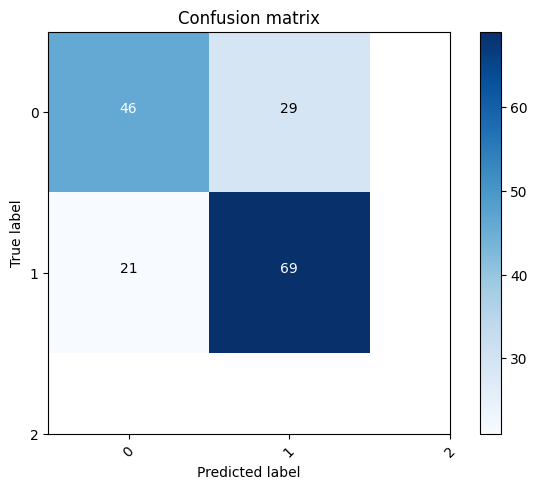

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)

metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Random Forest",metrics_df,classes = range(3))
dump(clf, 'rf.joblib') 

accuracy is:  0.6
Mean Absoulte error 0.40519342065184283
precision score 0.5922222222222222
recall score 0.5948065793481572
classification report
F1 Score 0.5920737189091999
              precision    recall  f1-score   support

           0       0.51      0.57      0.54        67
           1       0.68      0.62      0.65        98

    accuracy                           0.60       165
   macro avg       0.59      0.59      0.59       165
weighted avg       0.61      0.60      0.60       165



['decision.joblib']

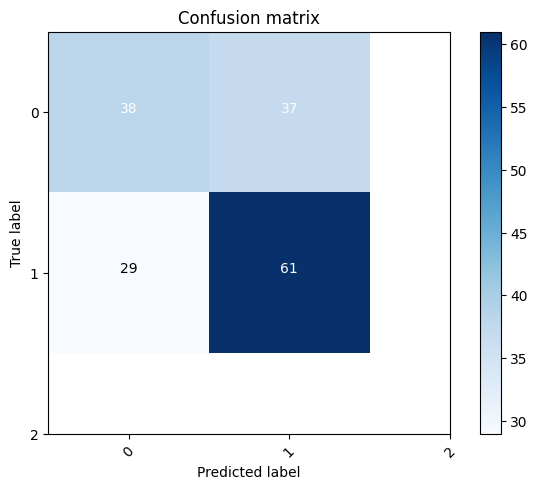

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Decision Tree",metrics_df,classes = range(3))
dump(clf, 'decision.joblib') 

accuracy is:  0.6606060606060606
Mean Absoulte error 0.31074481074481075
precision score 0.6377777777777778
recall score 0.6892551892551892
classification report
F1 Score 0.6247563352826511
              precision    recall  f1-score   support

           0       0.39      0.74      0.51        39
           1       0.89      0.63      0.74       126

    accuracy                           0.66       165
   macro avg       0.64      0.69      0.62       165
weighted avg       0.77      0.66      0.69       165



['GaussianNaiveBayes.joblib']

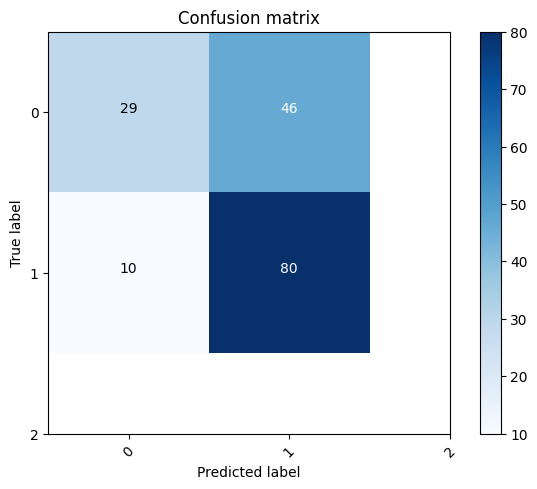

In [ ]:
from sklearn.naive_bayes import MultinomialNB
gau = MultinomialNB()
gau = gau.fit(X_train, y_train)
y_pred = gau.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Multi-Nomial Naive Bayes",metrics_df,classes = range(3))
dump(gau, 'GaussianNaiveBayes.joblib') 

accuracy is:  0.703030303030303
Mean Absoulte error 0.29874166161309884
precision score 0.6966666666666668
recall score 0.7012583383869011
classification report
F1 Score 0.69765528589058
              precision    recall  f1-score   support

           0       0.63      0.69      0.66        68
           1       0.77      0.71      0.74        97

    accuracy                           0.70       165
   macro avg       0.70      0.70      0.70       165
weighted avg       0.71      0.70      0.70       165



['SVM.joblib']

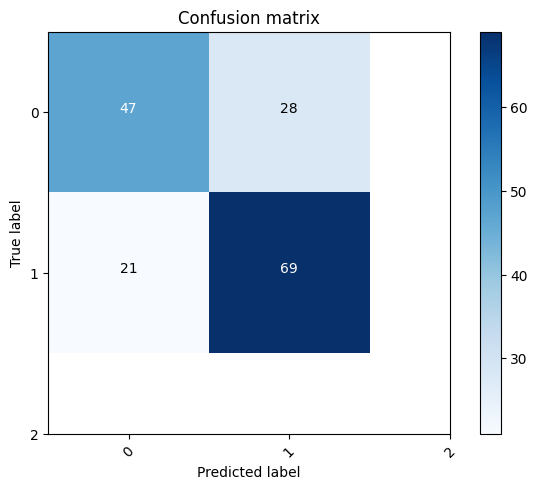

In [ ]:
from sklearn.svm import SVC
svm = SVC(max_iter = 1000)
svm = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"SVC",metrics_df,classes = range(3))
dump(svm, 'SVM.joblib') 

accuracy is:  0.7090909090909091
Mean Absoulte error 0.29279891304347827
precision score 0.7033333333333334
recall score 0.7072010869565217
classification report
F1 Score 0.7043010752688172
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        69
           1       0.77      0.72      0.74        96

    accuracy                           0.71       165
   macro avg       0.70      0.71      0.70       165
weighted avg       0.71      0.71      0.71       165



['LogisticRegression.joblib']

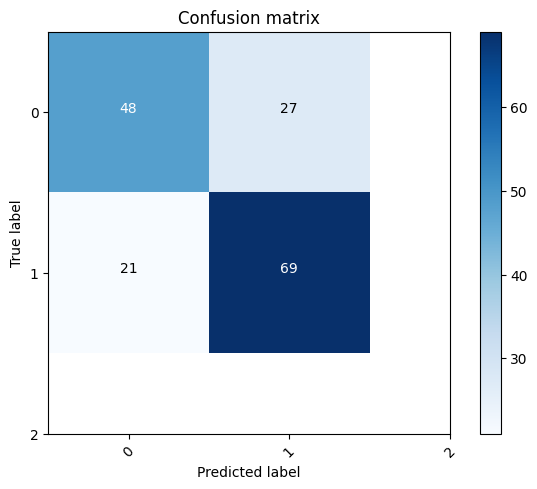

In [ ]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(max_iter = 1000)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Logistic Regression",metrics_df,classes = range(3))
dump(logi, 'LogisticRegression.joblib') 

accuracy is:  0.6909090909090909
Mean Absoulte error 0.3106060606060606
precision score 0.6833333333333333
recall score 0.6893939393939394
classification report
F1 Score 0.6842283012495779
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        66
           1       0.77      0.70      0.73        99

    accuracy                           0.69       165
   macro avg       0.68      0.69      0.68       165
weighted avg       0.70      0.69      0.69       165



['XGB.joblib']

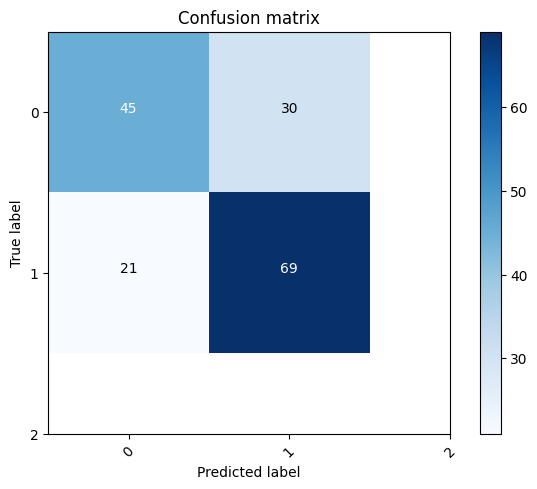

In [ ]:
from xgboost import XGBClassifier
logi = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7, n_estimators=300)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"XGB",metrics_df,classes = range(3))
dump(logi, 'XGB.joblib') 



accuracy is:  0.7212121212121212
Mean Absoulte error 0.2811197141155449
precision score 0.7177777777777778
recall score 0.718880285884455
classification report
F1 Score 0.7182209682209683
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        73
           1       0.76      0.74      0.75        92

    accuracy                           0.72       165
   macro avg       0.72      0.72      0.72       165
weighted avg       0.72      0.72      0.72       165



['ADA.joblib']

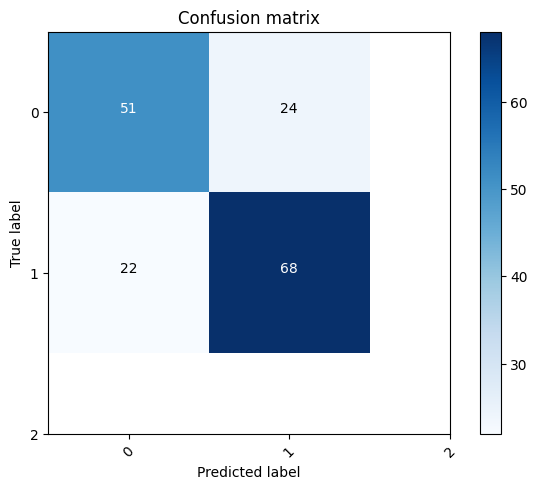

In [ ]:
from sklearn.ensemble import  AdaBoostClassifier

logi = AdaBoostClassifier(random_state=42, n_estimators=300)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"ADA",metrics_df,classes = range(3))
dump(logi, 'ADA.joblib') 

In [ ]:
metrics_df #google_translated_text

,Random Forest,Decision Tree,Multi-Nomial Naive Bayes,SVC,Logistic Regression,XGB,ADA
mae macro average,0.304676,0.405193,0.310745,0.298742,0.292799,0.310606,0.28112
precision macro average,0.69,0.592222,0.637778,0.696667,0.703333,0.683333,0.717778
recall macro average,0.695324,0.594807,0.689255,0.701258,0.707201,0.689394,0.71888
f1 score marco average,0.690965,0.592074,0.624756,0.697655,0.704301,0.684228,0.718221
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [ ]:
metrics_df #old-smote

,Random Forest,Decision Tree,Multi-Nomial Naive Bayes,SVC,Logistic Regression
mae macro average,0.249073,0.372106,0.296537,0.267857,0.267136
precision macro average,0.751471,0.628251,0.703715,0.73243,0.730341
recall macro average,0.750927,0.627894,0.703463,0.732143,0.732864
f1 score marco average,0.751082,0.6272,0.701852,0.732258,0.730884
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...
